<a href="https://colab.research.google.com/github/kareemullah123456789/NLP/blob/main/wordtovec_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Word2Vec Example for Google Colab
# This notebook demonstrates Word2Vec implementation using both Gensim and TensorFlow

# =====================================================
# 1. Setup and Imports
# =====================================================

!pip install gensim nltk matplotlib seaborn scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requi

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import gensim
from gensim.models import Word2Vec
import warnings
warnings.filterwarnings('ignore')

# Download required NLTK data
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
!ls

sample_data


In [11]:
# =====================================================
# 2. Data Preparation
# =====================================================

# Sample text data - you can replace this with your own dataset
sample_texts = [
    "The quick brown fox jumps over the lazy dog",
    "Python is a powerful programming language for data science",
    "Machine learning models can learn patterns from data",
    "Deep learning uses neural networks with multiple layers",
    "Natural language processing helps computers understand human language",
    "Word embeddings capture semantic relationships between words",
    "Vector representations of words enable mathematical operations",
    "Artificial intelligence is transforming various industries",
    "Data preprocessing is crucial for machine learning success",
    "Feature engineering improves model performance significantly",
    "Training data quality affects model accuracy",
    "Overfitting occurs when models memorize training data",
    "Cross-validation helps assess model generalization",
    "Hyperparameter tuning optimizes model performance",
    "Ensemble methods combine multiple models for better results"
]

# Text preprocessing function
def preprocess_text(text):
    """Clean and preprocess text data"""
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    return tokens

# Preprocess all texts
processed_texts = [preprocess_text(text) for text in sample_texts]
print("Sample preprocessed text:")
print(processed_texts[0])
print(f"\nTotal number of sentences: {len(processed_texts)}")

Sample preprocessed text:
['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']

Total number of sentences: 15


In [12]:

# =====================================================
# 3. Word2Vec Training with Gensim
# =====================================================

# Train Word2Vec model
model = Word2Vec(
    sentences=processed_texts,
    vector_size=100,        # Dimensionality of word vectors
    window=5,               # Maximum distance between current and predicted word
    min_count=1,            # Minimum word frequency
    workers=4,              # Number of worker threads
    sg=0,                   # 0 = CBOW, 1 = Skip-gram
    epochs=100              # Number of training epochs
)

print("Word2Vec model trained successfully!")
print(f"Vocabulary size: {len(model.wv.key_to_index)}")
print(f"Vector size: {model.vector_size}")


Word2Vec model trained successfully!
Vocabulary size: 72
Vector size: 100


In [13]:

# =====================================================
# 4. Exploring Word Embeddings
# =====================================================

# Get word vector
def get_word_vector(word):
    """Get vector representation of a word"""
    try:
        return model.wv[word]
    except KeyError:
        return f"Word '{word}' not found in vocabulary"

# Example: Get vector for 'python'
if 'python' in model.wv.key_to_index:
    python_vector = get_word_vector('python')
    print(f"Vector for 'python' (first 10 dimensions): {python_vector[:10]}")


Vector for 'python' (first 10 dimensions): [ 0.00852749 -0.0058839   0.00550339 -0.00034444 -0.00899694 -0.0038284
 -0.00111356 -0.00252615 -0.00224134 -0.00682382]


In [14]:

# Find similar words
def find_similar_words(word, top_n=5):
    """Find most similar words to a given word"""
    try:
        similar_words = model.wv.most_similar(word, topn=top_n)
        return similar_words
    except KeyError:
        return f"Word '{word}' not found in vocabulary"

# Example: Find words similar to 'data'
if 'data' in model.wv.key_to_index:
    similar_to_data = find_similar_words('data')
    print(f"\nWords similar to 'data': {similar_to_data}")



Words similar to 'data': [('word', 0.2923848032951355), ('transforming', 0.27057600021362305), ('multiple', 0.25347745418548584), ('machine', 0.2460385113954544), ('deep', 0.2441970705986023)]


In [15]:

# =====================================================
# 5. Word Analogies
# =====================================================

def word_analogy(word1, word2, word3):
    """Perform word analogy: word1 is to word2 as word3 is to ?"""
    try:
        result = model.wv.most_similar(positive=[word2, word3], negative=[word1], topn=1)
        return result[0]
    except KeyError as e:
        return f"One or more words not found in vocabulary: {e}"

# Example analogies (may not work well with small dataset)
print("\nWord Analogies:")
try:
    analogy_result = word_analogy('machine', 'learning', 'deep')
    print(f"machine : learning :: deep : {analogy_result}")
except:
    print("Analogy example requires larger vocabulary")



Word Analogies:
machine : learning :: deep : ('vector', 0.3085564970970154)


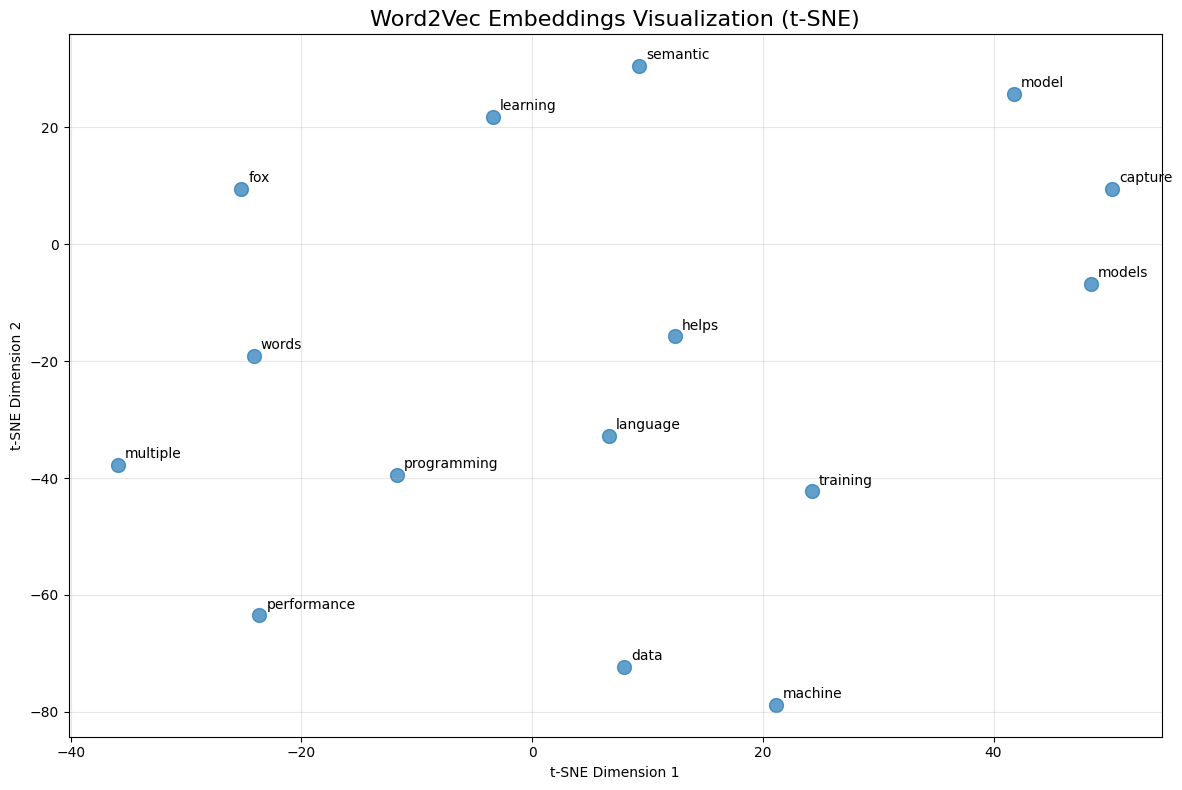

In [17]:
# =====================================================
# 6. Visualization with t-SNE
# =====================================================

def visualize_embeddings(model, words_to_plot=None, num_words=20):
    """Visualize word embeddings using t-SNE"""

    if words_to_plot is None:
        # Get most frequent words
        words_to_plot = list(model.wv.key_to_index.keys())[:num_words]

    # Get vectors for selected words
    vectors = [model.wv[word] for word in words_to_plot]
    vectors = np.array(vectors)  # Convert to numpy array

    # Apply t-SNE with proper perplexity
    perplexity = min(5, len(words_to_plot) - 1)
    if perplexity < 1:
        perplexity = 1

    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    embeddings_2d = tsne.fit_transform(vectors)

    # Create visualization
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.7, s=100)

    # Add word labels
    for i, word in enumerate(words_to_plot):
        plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]),
                    xytext=(5, 5), textcoords='offset points', fontsize=10)

    plt.title('Word2Vec Embeddings Visualization (t-SNE)', fontsize=16)
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Visualize embeddings
visualize_embeddings(model, num_words=15)

In [19]:

# =====================================================
# 7. Cosine Similarity Analysis
# =====================================================

def calculate_similarity(word1, word2):
    """Calculate cosine similarity between two words"""
    try:
        similarity = model.wv.similarity(word1, word2)
        return similarity
    except KeyError as e:
        return f"One or more words not found: {e}"

# Example similarities
word_pairs = [
    ('machine', 'learning'),
    ('data', 'science'),
    ('neural', 'networks'),
    ('model', 'training'),
    ('deep', 'learning')
]

print("\nWord Similarity Analysis:")
for word1, word2 in word_pairs:
    try:
        similarity = calculate_similarity(word1, word2)
        print(f"Similarity between '{word1}' and '{word2}': {similarity:.4f}")
    except:
        print(f"Cannot calculate similarity for '{word1}' and '{word2}'")



Word Similarity Analysis:
Similarity between 'machine' and 'learning': -0.1246
Similarity between 'data' and 'science': -0.0140
Similarity between 'neural' and 'networks': 0.0600
Similarity between 'model' and 'training': 0.0975
Similarity between 'deep' and 'learning': -0.0121


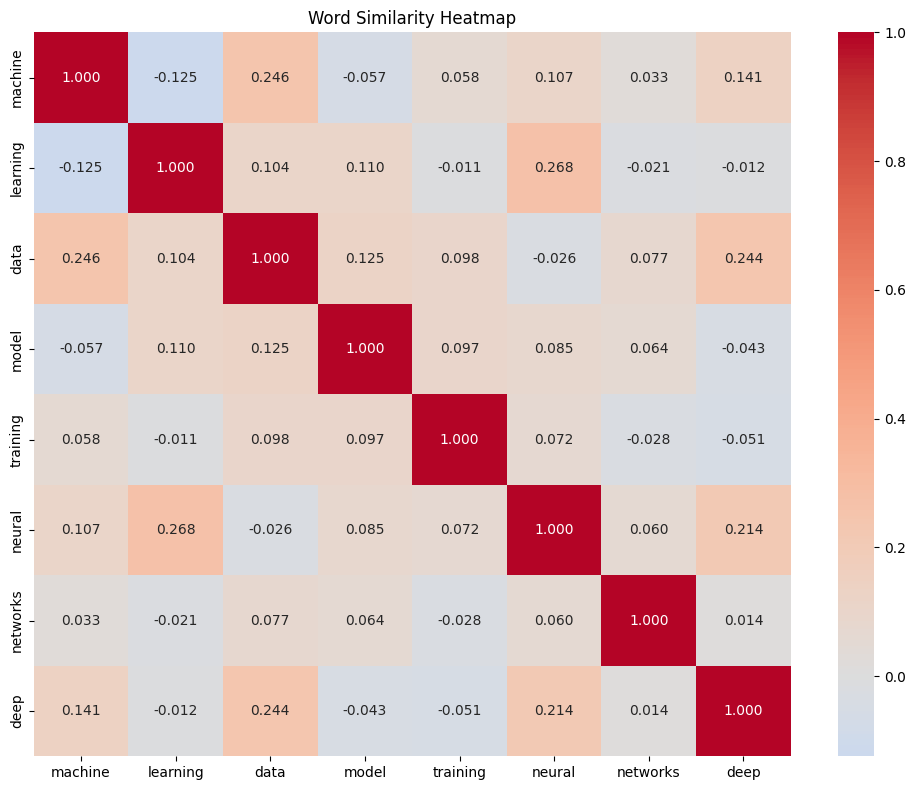

In [20]:

# =====================================================
# 8. Similarity Heatmap
# =====================================================

def create_similarity_heatmap(words_list):
    """Create a heatmap of word similarities"""
    # Filter words that exist in vocabulary
    valid_words = [word for word in words_list if word in model.wv.key_to_index]

    if len(valid_words) < 2:
        print("Not enough valid words for heatmap")
        return

    # Calculate similarity matrix
    similarity_matrix = np.zeros((len(valid_words), len(valid_words)))

    for i, word1 in enumerate(valid_words):
        for j, word2 in enumerate(valid_words):
            similarity_matrix[i][j] = model.wv.similarity(word1, word2)

    # Create heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_matrix,
                xticklabels=valid_words,
                yticklabels=valid_words,
                annot=True,
                cmap='coolwarm',
                center=0,
                fmt='.3f')
    plt.title('Word Similarity Heatmap')
    plt.tight_layout()
    plt.show()

# Create heatmap for selected words
selected_words = ['machine', 'learning', 'data', 'model', 'training', 'neural', 'networks', 'deep']
create_similarity_heatmap(selected_words)


In [21]:

# =====================================================
# 9. Save and Load Model
# =====================================================

# Save the model
model.save("word2vec_model.model")
print("Model saved successfully!")

# Load the model (example)
# loaded_model = Word2Vec.load("word2vec_model.model")
# print("Model loaded successfully!")


Model saved successfully!


In [22]:

# =====================================================
# 10. Using Pre-trained Word2Vec Models
# =====================================================

# Example of loading Google's pre-trained Word2Vec model (commented out due to size)
# Note: This requires downloading the model file (3.6GB)
"""
# Download and load Google's pre-trained model
import gensim.downloader as api

# List available models
print("Available pre-trained models:")
for model_name in api.info()['models'].keys():
    if 'word2vec' in model_name:
        print(f"- {model_name}")

# Load a pre-trained model (this will download the model)
# pretrained_model = api.load('word2vec-google-news-300')
# print(f"Pre-trained model loaded with vocabulary size: {len(pretrained_model.key_to_index)}")

# Example usage with pre-trained model
# similar_words = pretrained_model.most_similar('python', topn=5)
# print(f"Words similar to 'python': {similar_words}")
"""

# =====================================================
# 11. Evaluation and Model Comparison
# =====================================================

def evaluate_model(model, test_pairs):
    """Evaluate model performance on word similarity tasks"""
    correlations = []

    for word1, word2, human_score in test_pairs:
        try:
            model_score = model.wv.similarity(word1, word2)
            correlations.append((human_score, model_score))
        except KeyError:
            continue

    if correlations:
        human_scores = [x[0] for x in correlations]
        model_scores = [x[1] for x in correlations]
        correlation = np.corrcoef(human_scores, model_scores)[0, 1]
        return correlation
    else:
        return None

# Example evaluation data (word1, word2, human_similarity_score)
test_pairs = [
    ('machine', 'learning', 0.8),
    ('data', 'science', 0.7),
    ('neural', 'networks', 0.9),
    ('model', 'training', 0.6),
    ('deep', 'learning', 0.8)
]

correlation = evaluate_model(model, test_pairs)
if correlation:
    print(f"\nModel correlation with human judgments: {correlation:.4f}")



Model correlation with human judgments: -0.3047


In [23]:

# =====================================================
# 12. Advanced: Skip-gram vs CBOW Comparison
# =====================================================

# Train Skip-gram model
skipgram_model = Word2Vec(
    sentences=processed_texts,
    vector_size=100,
    window=5,
    min_count=1,
    workers=4,
    sg=1,  # Skip-gram
    epochs=100
)

# Train CBOW model
cbow_model = Word2Vec(
    sentences=processed_texts,
    vector_size=100,
    window=5,
    min_count=1,
    workers=4,
    sg=0,  # CBOW
    epochs=100
)

print("Skip-gram and CBOW models trained!")


Skip-gram and CBOW models trained!


In [24]:

# Compare performance
def compare_models(word, models, model_names):
    """Compare similar words across different models"""
    print(f"\nSimilar words to '{word}':")
    for model, name in zip(models, model_names):
        try:
            similar = model.wv.most_similar(word, topn=3)
            print(f"{name}: {similar}")
        except KeyError:
            print(f"{name}: Word not found in vocabulary")

if 'learning' in skipgram_model.wv.key_to_index:
    compare_models('learning', [skipgram_model, cbow_model], ['Skip-gram', 'CBOW'])



Similar words to 'learning':
Skip-gram: [('semantic', 0.4063732326030731), ('language', 0.379777193069458), ('results', 0.35323742032051086)]
CBOW: [('semantic', 0.31394949555397034), ('neural', 0.2676531672477722), ('language', 0.2545478641986847)]


In [25]:

# =====================================================
# 13. Summary and Best Practices
# =====================================================

print("\n" + "="*50)
print("WORD2VEC SUMMARY AND BEST PRACTICES")
print("="*50)

print("""
Key Parameters:
- vector_size: Dimensionality of embeddings (50-300 typical)
- window: Context window size (5-10 typical)
- min_count: Minimum word frequency (1-5 typical)
- sg: 0 for CBOW, 1 for Skip-gram
- epochs: Number of training iterations (100-300 typical)

Best Practices:
1. Preprocess text thoroughly (lowercase, remove punctuation, etc.)
2. Use larger corpora for better embeddings
3. Skip-gram works better with small datasets
4. CBOW is faster and works well with frequent words
5. Experiment with hyperparameters
6. Consider using pre-trained models for production
7. Evaluate embeddings on downstream tasks

Applications:
- Semantic search
- Document similarity
- Recommendation systems
- Feature engineering for ML models
- Text classification
- Clustering
""")

print("Example completed successfully!")


WORD2VEC SUMMARY AND BEST PRACTICES

Key Parameters:
- vector_size: Dimensionality of embeddings (50-300 typical)
- window: Context window size (5-10 typical)
- min_count: Minimum word frequency (1-5 typical)
- sg: 0 for CBOW, 1 for Skip-gram
- epochs: Number of training iterations (100-300 typical)

Best Practices:
1. Preprocess text thoroughly (lowercase, remove punctuation, etc.)
2. Use larger corpora for better embeddings
3. Skip-gram works better with small datasets
4. CBOW is faster and works well with frequent words
5. Experiment with hyperparameters
6. Consider using pre-trained models for production
7. Evaluate embeddings on downstream tasks

Applications:
- Semantic search
- Document similarity
- Recommendation systems
- Feature engineering for ML models
- Text classification
- Clustering

Example completed successfully!
